# Part 2: search for correlations between gay bars & zips pride passed through

In my original I used another amateur approach to visualize the dynamic of queer & cis/het communities - this time instead of using my data viz toolbox exclusively I will use regression to probe for conclusions in the data

Lets see what insights GAYBORHOODS can offer us today

In [1]:
# starting with data cleaning like last time

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

gaybourhoods = pd.read_csv("data/gaybourhoods.csv")

cords = pd.read_csv("data/zip_lat_long.csv")
gaydf = pd.read_csv("data/tax_and_gay.csv")

gaydf = gaydf.merge(cords, left_on="zip", right_on="ZIP")
gaydf = gaydf.rename({
    "LAT": "lat",
    "LNG": "long",
}, axis="columns")
del gaydf['zip.1']
del gaydf['ZIP']

print(gaydf.describe())
print("------------------------------------------------------------------------")
print(gaydf)

                zip     population  gay tax rate  overall tax paid  income  \
count   2184.000000    2184.000000   2184.000000       2184.000000  2184.0   
mean   48935.203297   26691.730769   4373.997253        596.719322     1.0   
std    35451.335807   17960.713867   3054.620840        615.174358     0.0   
min     1730.000000     160.000000      0.000000          0.000000     1.0   
25%    11360.750000   13337.500000   2110.000000        217.000000     1.0   
50%    60023.500000   24070.000000   3900.000000        434.000000     1.0   
75%    80227.250000   35640.000000   5902.500000        777.250000     1.0   
max    98686.000000  114420.000000  24560.000000       9166.000000     1.0   

               lat         long  
count  2184.000000  2184.000000  
mean     38.016518   -91.296804  
std       5.210272    18.476699  
min      25.572213  -123.118977  
25%      33.997027  -105.037767  
50%      39.930150   -87.603617  
75%      40.960828   -74.310179  
max      47.916786   -70.

In [2]:
def loadprideindexes(secdf):
    gaydf = pd.DataFrame(zip(gaybourhoods['GEOID10'], gaybourhoods['ParadeFlag'], gaybourhoods['CountBars']))
    gaydf.columns=(('zip', 'pride parade index', 'gay bars index'))
    gaydf = gaydf.merge(secdf, left_on="zip", right_on="ZIP")
    
    return gaydf

def notzip(dat):
    del dat['zip'];    del dat['ZIP']

cords = pd.read_csv("data/zip_lat_long.csv")
gaydf = loadprideindexes(cords)

notzip(gaydf)

gaydf = gaydf.rename({"LAT": "lat", "LNG": "long",}, axis="columns")

print(gaydf.describe())
print("------------------------------------------------------------------------")
print(gaydf)

gaydf.to_csv("data/gay_pride", index=False)

       pride parade index  gay bars index          lat         long
count         2328.000000     2328.000000  2328.000000  2328.000000
mean             0.017612        0.118127    38.044304   -91.221236
std              0.131563        0.861863     5.148365    18.533499
min              0.000000        0.000000    25.572213  -123.118977
25%              0.000000        0.000000    34.021932  -105.049099
50%              0.000000        0.000000    39.899977   -87.494097
75%              0.000000        0.000000    40.912413   -74.288743
max              1.000000       17.000000    47.916786   -70.758184
------------------------------------------------------------------------
      pride parade index  gay bars index        lat        long
0                      1              15  34.093828 -118.381697
1                      0              17  37.758057 -122.435410
2                      1               5  40.742039  -74.000620
3                      1              10  40.734012  -74.00

In [3]:
gaydf = pd.read_csv("data/gay_pride")

Looks like my old work runs fine, time to use my old plots

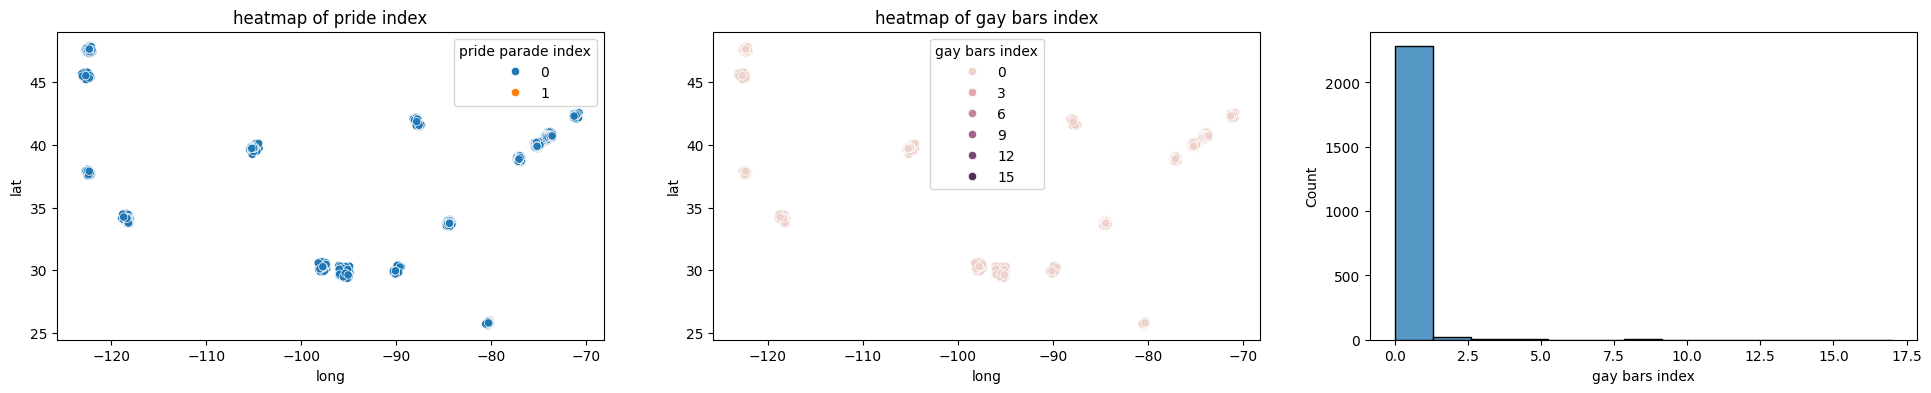

In [11]:
gaydfprideplot = gaydf.copy()

fig, axes = plt.subplots(1, 3, figsize=(24, 4))

plot3 = sns.scatterplot(data=gaydfprideplot, x="long", y="lat", hue="pride parade index", ax=axes[0])
_ = plot3.set(xlabel="long", ylabel="lat", title = "heatmap of pride index")

plot4 = sns.scatterplot(data=gaydfprideplot, x="long", y="lat", hue="gay bars index", ax=axes[1])
_ = plot4.set(xlabel="long", ylabel="lat", title = "heatmap of gay bars index")

plot5 = sns.histplot(gaydfgaybarsplot["gay bars index"], ax=axes[2]) # type: ignore